In [1]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

(406, 9)


In [3]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


## 1. How many cars and how many attributes are in the data set

In [9]:
print("Number of cars: ", data.shape[0])
print("Number of attributes: ", data.shape[1])

Number of cars:  406
Number of attributes:  9


## 2. 

###  How many distinct car companies are represented in the data set?

In [15]:
data["company"] = data["car_name"].str.split(" ").str[0]
data["company"].nunique()

38

### What is the name of the car with the best MPG? 

In [12]:
data.loc[data["mpg"] == data["mpg"].max(), ["car_name", "mpg"]] 

,car_name,mpg
329,mazda glc,46.6


### What car company produced the most 8-cylinder cars? 

In [22]:
count_cylinder_df = data.groupby(["company", "cylinders"])[["car_name"]].count().reset_index()
eight_cylinders_df = count_cylinder_df[count_cylinder_df["cylinders"] == 8.0]
eight_cylinders_df[eight_cylinders_df["car_name"] == eight_cylinders_df["car_name"].max()]

,company,cylinders,car_name
29,ford,8.0,22


### What are the names of 3-cylinder cars? 

In [24]:
data.loc[data["cylinders"] == 3.0, ["cylinders", "car_name"]]

,cylinders,car_name
78,3.0,mazda rx2 coupe
118,3.0,maxda rx3
250,3.0,mazda rx-4
341,3.0,mazda rx-7 gs


### Do some internet search that can tell you about the history and popularity of those 3-cylinder cars.

> The cars listed in the given data appear to have 2 or 3 rotor Wankel rotary engines which produce power similar to a larger 4 or 6 cylinder engine, but with fewer moving parts. These engines were used by Mazda in their vehicles during the 1970s and 1980s.
> At that time, Mazda was the only major automaker producing cars with Wankel engines. The 1978 Mazda RX-7, for example, was one of the most popular sports cars of its time and is still highly sought after by collectors today.

## 4. Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins. Write 2-3 sentences summarizing some interesting aspects of the data by looking at the histograms.

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>],
       [<AxesSubplot:title={'center':'model'}>,
        <AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>]],
      dtype=object)

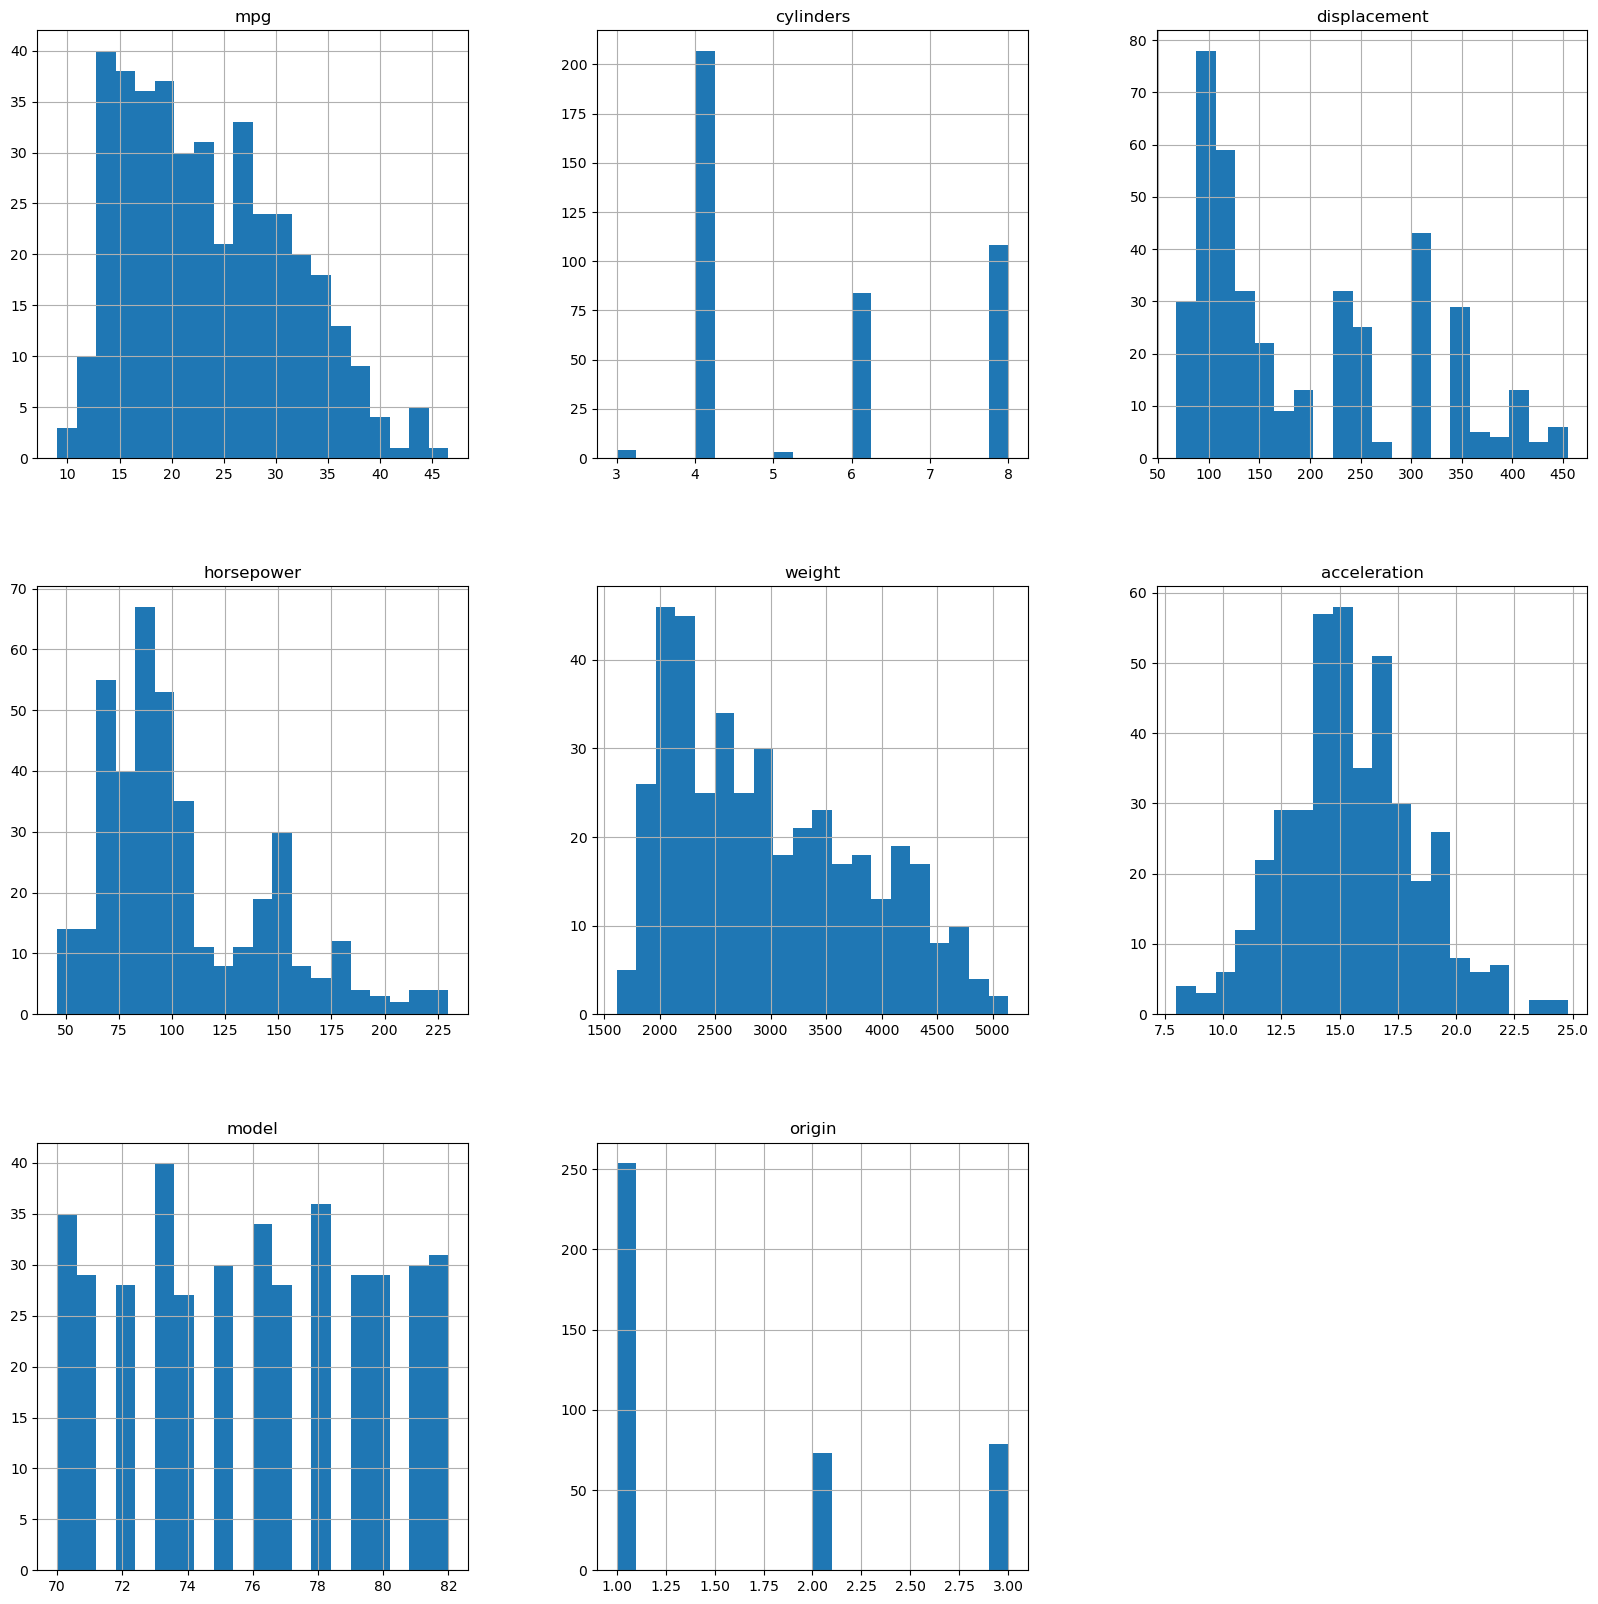

In [27]:
# plot hist for each attr
data.hist(figsize=(20, 20), bins=20)

## 5. Plot a scatterplot of weight vs. MPG attributes. What do you conclude about the relationship between the attributes? What is the correlation coefficient between the 2 attributes?

<AxesSubplot:xlabel='weight', ylabel='mpg'>

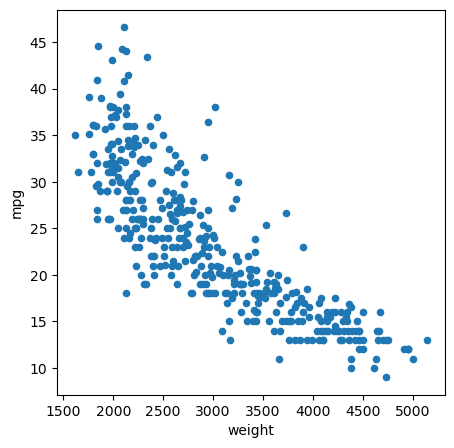

In [30]:
data.plot(kind="scatter", x="weight", y="mpg", figsize=(5, 5))

> Weight and MPG are negatively correlated. As weight increases, MPG decreases.

In [42]:
print("correlation coefficient between the 2 attributes: ", data[["weight", "mpg"]].corr()[["weight"]].iloc[-1].to_list()[0])


correlation coefficient between the 2 attributes:  -0.8317409332443344


## 7. Show 2 more scatterplots that are interesting do you. Discuss what you see.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

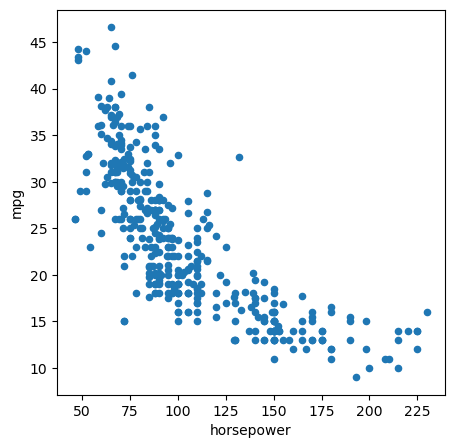

In [45]:
data.plot(kind="scatter", x="horsepower", y="mpg", figsize=(5, 5))

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

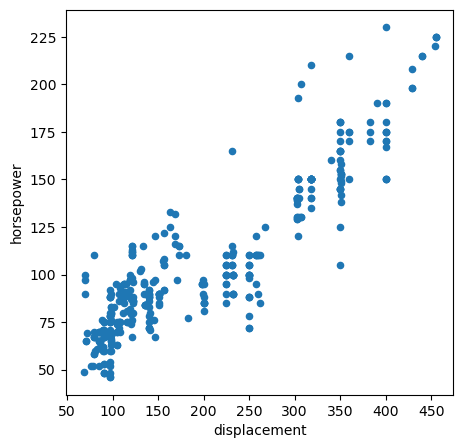

In [49]:
data.plot(kind="scatter", x="displacement", y="horsepower", figsize=(5, 5))

> According to wiki, displacement or engine displacement is the measure of the cylinder volume. I thought that if the displacement rose, the horsepower (how quickly the force is produced) would increase, so the displacement of the engine would be positively correlated with the horsepower of the car. As my expectation, the correlation is depicted precisely on the above scatter plot.

## 8. Plot a time series for all the companies that show how many new cars they introduces during each year. Do you see some interesting trends? (Hint: data.car name.str.split()[0] returns a vector of the first word of car name column.)

In [57]:
data["year"] = data["model"] + 1900

In [60]:
pivot_time_series = data.groupby(["year", "company"])[["car_name"]].count().reset_index().pivot(index="year", columns="company", values="car_name").fillna(0)

<AxesSubplot:xlabel='year'>

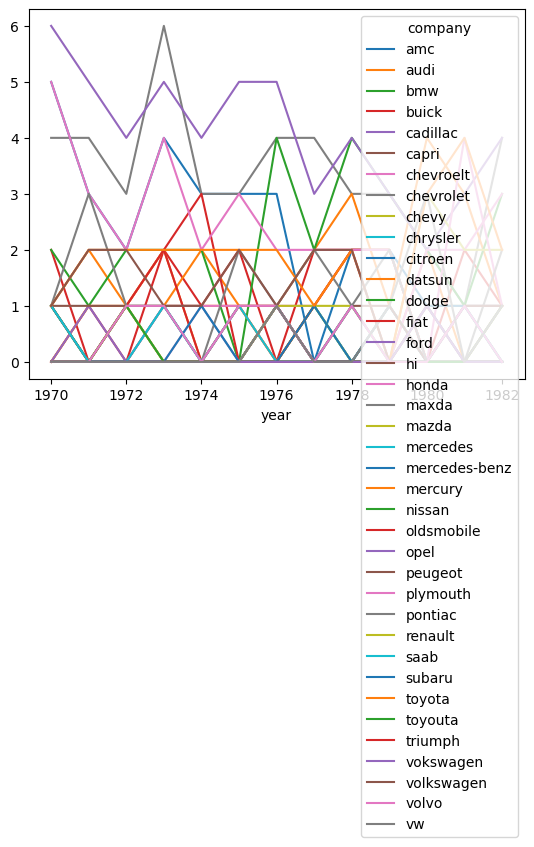

In [65]:
pivot_time_series.plot()